In [1]:
import tensorflow as tf
print(tf.__version__) #2.0에선 실행이 안된다 ㅠ

C:\Users\308_2\.conda\envs\minji\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\308_2\.conda\envs\minji\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\308_2\.conda\envs\minji\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint

1.14.0


C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\308_2\.conda\envs\minji\lib\site-packages\tensorboar

In [2]:
!pip3 show gym
!pip3 show pyglet
!pip3 show mpi4py

Name: gym
Version: 0.18.0
Summary: The OpenAI Gym: A toolkit for developing and comparing your reinforcement learning agents.
Home-page: https://github.com/openai/gym
Author: OpenAI
Author-email: gym@openai.com
License: UNKNOWN
Location: c:\windows\system32\gym
Requires: scipy, numpy, pyglet, Pillow, cloudpickle
Required-by: stable-baselines
Name: pyglet
Version: 1.5.0
Summary: Cross-platform windowing and multimedia library
Home-page: http://pyglet.readthedocs.org/en/latest/
Author: Alex Holkner
Author-email: Alex.Holkner@gmail.com
License: BSD
Location: c:\users\308_2\.conda\envs\minji\lib\site-packages
Requires: future
Required-by: gym
Name: mpi4py
Version: 3.0.3
Summary: Python bindings for MPI
Home-page: https://bitbucket.org/mpi4py/mpi4py/
Author: Lisandro Dalcin
Author-email: dalcinl@gmail.com
License: BSD
Location: c:\users\308_2\.conda\envs\minji\lib\site-packages
Requires: 
Required-by: 


In [14]:
# 애니메이션을 만드는 함수 https://exmemory.tistory.com/28
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_mp4(frames):
    
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=18) # 속도 조절,, 작으면 빨라짐
    anim.save('./movie_carpole.mp4') # 애니메이션을 저장하는 부분

In [17]:
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

frames=[] #gif 만들기 위함

# Create the environment
env = gym.make('CartPole-v1')
#env.reset()

#ppo2는 vectorized된 환경 필요
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

# Define the model
model = PPO2(MlpPolicy, env, verbose=1)

# 훈련 얼마나 시킬건지?? -> 보통 오래할수록 잘됨
model.learn(total_timesteps=30000)

# 움직임 확인하기
obs = env.reset()
for i in range(10000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    frames.append(env.render(mode = 'rgb_array'))
    env.render() #창띄우기
env.close()


-------------------------------------
| approxkl           | 7.004687e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.0089       |
| fps                | 519          |
| n_updates          | 1            |
| policy_entropy     | 0.69306093   |
| policy_loss        | -0.001190479 |
| serial_timesteps   | 128          |
| time_elapsed       | 0            |
| total_timesteps    | 128          |
| value_loss         | 30.768387    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00024408566 |
| clipfrac           | 0.0           |
| explained_variance | -0.0191       |
| fps                | 1974          |
| n_updates          | 2             |
| policy_entropy     | 0.69211626    |
| policy_loss        | -0.0056351284 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.247         |
| total_timesteps    | 256           |
| value_loss         | 30.465744     |
--------------------------------------

---------------------------------------
| approxkl           | 0.00037666163  |
| clipfrac           | 0.0            |
| explained_variance | 0.0242         |
| fps                | 2175           |
| n_updates          | 14             |
| policy_entropy     | 0.6185543      |
| policy_loss        | -0.00026290066 |
| serial_timesteps   | 1792           |
| time_elapsed       | 0.984          |
| total_timesteps    | 1792           |
| value_loss         | 40.29719       |
---------------------------------------
--------------------------------------
| approxkl           | 4.0465828e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0133       |
| fps                | 2212          |
| n_updates          | 15            |
| policy_entropy     | 0.64627796    |
| policy_loss        | 8.383207e-05  |
| serial_timesteps   | 1920          |
| time_elapsed       | 1.04          |
| total_timesteps    | 1920          |
| value_loss         | 43.530453     |
------------

--------------------------------------
| approxkl           | 0.00041485726 |
| clipfrac           | 0.0           |
| explained_variance | 0.139         |
| fps                | 2070          |
| n_updates          | 31            |
| policy_entropy     | 0.5691475     |
| policy_loss        | -0.0040288335 |
| serial_timesteps   | 3968          |
| time_elapsed       | 2.01          |
| total_timesteps    | 3968          |
| value_loss         | 71.261284     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00026427448 |
| clipfrac           | 0.0           |
| explained_variance | 0.0252        |
| fps                | 2251          |
| n_updates          | 32            |
| policy_entropy     | 0.5888297     |
| policy_loss        | -0.0031881696 |
| serial_timesteps   | 4096          |
| time_elapsed       | 2.07          |
| total_timesteps    | 4096          |
| value_loss         | 78.40505      |
-------------------------

--------------------------------------
| approxkl           | 5.025242e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.381         |
| fps                | 2070          |
| n_updates          | 48            |
| policy_entropy     | 0.5914561     |
| policy_loss        | -0.0005584811 |
| serial_timesteps   | 6144          |
| time_elapsed       | 3.04          |
| total_timesteps    | 6144          |
| value_loss         | 81.83907      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00011077276 |
| clipfrac           | 0.0           |
| explained_variance | 0.0965        |
| fps                | 2139          |
| n_updates          | 49            |
| policy_entropy     | 0.5514669     |
| policy_loss        | 0.00011694059 |
| serial_timesteps   | 6272          |
| time_elapsed       | 3.1           |
| total_timesteps    | 6272          |
| value_loss         | 58.880474     |
-------------------------

--------------------------------------
| approxkl           | 4.7660447e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0154        |
| fps                | 2070          |
| n_updates          | 65            |
| policy_entropy     | 0.5751651     |
| policy_loss        | 0.0016334883  |
| serial_timesteps   | 8320          |
| time_elapsed       | 4.05          |
| total_timesteps    | 8320          |
| value_loss         | 53.007        |
--------------------------------------
---------------------------------------
| approxkl           | 6.4179108e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.149          |
| fps                | 2139           |
| n_updates          | 66             |
| policy_entropy     | 0.57420564     |
| policy_loss        | -0.00039317715 |
| serial_timesteps   | 8448           |
| time_elapsed       | 4.12           |
| total_timesteps    | 8448           |
| value_loss         | 66.43558       |
-------------

-------------------------------------
| approxkl           | 0.0010148062 |
| clipfrac           | 0.0          |
| explained_variance | -0.0206      |
| fps                | 2139         |
| n_updates          | 82           |
| policy_entropy     | 0.5765956    |
| policy_loss        | 0.0012337212 |
| serial_timesteps   | 10496        |
| time_elapsed       | 5.08         |
| total_timesteps    | 10496        |
| value_loss         | 55.790596    |
-------------------------------------
--------------------------------------
| approxkl           | 1.0750576e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0141        |
| fps                | 2069          |
| n_updates          | 83            |
| policy_entropy     | 0.57270074    |
| policy_loss        | 0.0005116421  |
| serial_timesteps   | 10624         |
| time_elapsed       | 5.14          |
| total_timesteps    | 10624         |
| value_loss         | 65.40574      |
--------------------------------------

-------------------------------------
| approxkl           | 0.0015009246 |
| clipfrac           | 0.00390625   |
| explained_variance | 0.247        |
| fps                | 1974         |
| n_updates          | 99           |
| policy_entropy     | 0.564075     |
| policy_loss        | 0.005694028  |
| serial_timesteps   | 12672        |
| time_elapsed       | 6.12         |
| total_timesteps    | 12672        |
| value_loss         | 43.49335     |
-------------------------------------
--------------------------------------
| approxkl           | 4.7101853e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.394         |
| fps                | 2070          |
| n_updates          | 100           |
| policy_entropy     | 0.5734242     |
| policy_loss        | 0.00015273935 |
| serial_timesteps   | 12800         |
| time_elapsed       | 6.19          |
| total_timesteps    | 12800         |
| value_loss         | 39.839417     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00021089602 |
| clipfrac           | 0.0           |
| explained_variance | 0.0731        |
| fps                | 2175          |
| n_updates          | 116           |
| policy_entropy     | 0.57199967    |
| policy_loss        | -0.0023610091 |
| serial_timesteps   | 14848         |
| time_elapsed       | 7.16          |
| total_timesteps    | 14848         |
| value_loss         | 50.47724      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0009206637 |
| clipfrac           | 0.0          |
| explained_variance | 0.0206       |
| fps                | 2212         |
| n_updates          | 117          |
| policy_entropy     | 0.5655167    |
| policy_loss        | 0.000668667  |
| serial_timesteps   | 14976        |
| time_elapsed       | 7.22         |
| total_timesteps    | 14976        |
| value_loss         | 63.474957    |
-------------------------------------

---------------------------------------
| approxkl           | 6.6962716e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.0928         |
| fps                | 2175           |
| n_updates          | 133            |
| policy_entropy     | 0.5788995      |
| policy_loss        | -0.00021765509 |
| serial_timesteps   | 17024          |
| time_elapsed       | 8.18           |
| total_timesteps    | 17024          |
| value_loss         | 44.065147      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00011340734 |
| clipfrac           | 0.0           |
| explained_variance | 0.0318        |
| fps                | 2139          |
| n_updates          | 134           |
| policy_entropy     | 0.5948061     |
| policy_loss        | 7.414026e-06  |
| serial_timesteps   | 17152         |
| time_elapsed       | 8.24          |
| total_timesteps    | 17152         |
| value_loss         | 55.831226     |
------------

-------------------------------------
| approxkl           | 0.0025251627 |
| clipfrac           | 0.009765625  |
| explained_variance | 0.482        |
| fps                | 2070         |
| n_updates          | 150          |
| policy_entropy     | 0.5672497    |
| policy_loss        | -0.004319124 |
| serial_timesteps   | 19200        |
| time_elapsed       | 9.2          |
| total_timesteps    | 19200        |
| value_loss         | 37.468864    |
-------------------------------------
---------------------------------------
| approxkl           | 0.000101032456 |
| clipfrac           | 0.0            |
| explained_variance | 0.537          |
| fps                | 2070           |
| n_updates          | 151            |
| policy_entropy     | 0.5902951      |
| policy_loss        | 9.327731e-05   |
| serial_timesteps   | 19328          |
| time_elapsed       | 9.26           |
| total_timesteps    | 19328          |
| value_loss         | 34.66238       |
--------------------------

---------------------------------------
| approxkl           | 5.1295676e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.227          |
| fps                | 2037           |
| n_updates          | 167            |
| policy_entropy     | 0.55041814     |
| policy_loss        | -0.00016110227 |
| serial_timesteps   | 21376          |
| time_elapsed       | 10.3           |
| total_timesteps    | 21376          |
| value_loss         | 32.61374       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0002628086 |
| clipfrac           | 0.0          |
| explained_variance | 0.404        |
| fps                | 2103         |
| n_updates          | 168          |
| policy_entropy     | 0.5724102    |
| policy_loss        | -0.003019959 |
| serial_timesteps   | 21504        |
| time_elapsed       | 10.3         |
| total_timesteps    | 21504        |
| value_loss         | 48.11332     |
------------------------

--------------------------------------
| approxkl           | 1.6007161e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.702         |
| fps                | 2037          |
| n_updates          | 184           |
| policy_entropy     | 0.5925432     |
| policy_loss        | 0.0001686227  |
| serial_timesteps   | 23552         |
| time_elapsed       | 11.3          |
| total_timesteps    | 23552         |
| value_loss         | 38.979794     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00059369096 |
| clipfrac           | 0.0           |
| explained_variance | 0.815         |
| fps                | 2103          |
| n_updates          | 185           |
| policy_entropy     | 0.54799557    |
| policy_loss        | 0.00024555647 |
| serial_timesteps   | 23680         |
| time_elapsed       | 11.4          |
| total_timesteps    | 23680         |
| value_loss         | 23.153767     |
-------------------------

--------------------------------------
| approxkl           | 0.00024193141 |
| clipfrac           | 0.0           |
| explained_variance | -0.0296       |
| fps                | 2103          |
| n_updates          | 201           |
| policy_entropy     | 0.53715116    |
| policy_loss        | -0.0021275398 |
| serial_timesteps   | 25728         |
| time_elapsed       | 12.4          |
| total_timesteps    | 25728         |
| value_loss         | 25.035866     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0024214948  |
| clipfrac           | 0.01953125    |
| explained_variance | -0.01         |
| fps                | 2251          |
| n_updates          | 202           |
| policy_entropy     | 0.593241      |
| policy_loss        | -0.0008405949 |
| serial_timesteps   | 25856         |
| time_elapsed       | 12.4          |
| total_timesteps    | 25856         |
| value_loss         | 24.498352     |
-------------------------

--------------------------------------
| approxkl           | 0.0013647042  |
| clipfrac           | 0.0           |
| explained_variance | 0.261         |
| fps                | 2139          |
| n_updates          | 218           |
| policy_entropy     | 0.5853601     |
| policy_loss        | -0.0017983946 |
| serial_timesteps   | 27904         |
| time_elapsed       | 13.4          |
| total_timesteps    | 27904         |
| value_loss         | 72.124084     |
--------------------------------------
--------------------------------------
| approxkl           | 7.0723934e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.014        |
| fps                | 2070          |
| n_updates          | 219           |
| policy_entropy     | 0.5800086     |
| policy_loss        | 4.437077e-05  |
| serial_timesteps   | 28032         |
| time_elapsed       | 13.5          |
| total_timesteps    | 28032         |
| value_loss         | 21.20391      |
-------------------------

In [18]:
frames

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

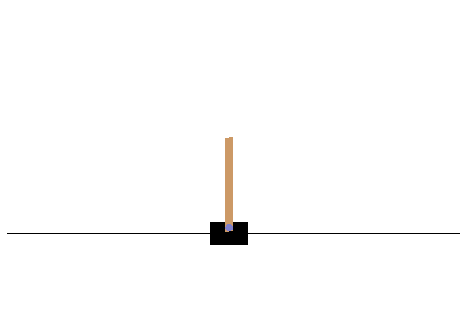

In [19]:
display_frames_as_mp4(frames)